In [88]:
import pandas as pd
import numpy as np

train = pd.read_csv('../data/raw/v2/train.csv')
train.head()

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,8.40 km/L,0.72 L/10km,0.98 L/10km,208
1,2,TOYOTI,PICKUP TRUCK - SMALL,not-available,6.0,A5,X,7.25 km per L,9.70 L/100km,11.96 L/100km,325
2,3,MATSUDA,COMPACT,2.0,4.0,AS6,X,9.80 km/L,38.70 mpg Imp.,31.76 mpg Imp.,170
3,4,CHEVO,VAN - PASSENGER,unknown,8.0,A6,X,1.73 L/10km,11.70 liters per 100 km,14.78 liters per 100 km,362
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,8.10 L/100km,35.76 mpg Imp.,8.01 liters per 100 km,180


In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54937 entries, 0 to 54936
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id                     54937 non-null  int64 
 1   Make                   54937 non-null  object
 2   Vehicle Class          54398 non-null  object
 3   Engine Size(L)         53544 non-null  object
 4   Cylinders              53739 non-null  object
 5   Transmission           54527 non-null  object
 6   Fuel Type              54391 non-null  object
 7   Fuel Consumption City  53369 non-null  object
 8   Fuel Consumption Hwy   53236 non-null  object
 9   Fuel Consumption Comb  53263 non-null  object
 10  CO2 Emissions(g/km)    54937 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 4.6+ MB


In [90]:
train.shape

(54937, 11)

In [91]:
train.describe()

,Id,CO2 Emissions(g/km)
count,54937.000000,54937.000000
mean,27469.000000,246.688680
std,15859.090206,67.571095
min,1.000000,96.000000
25%,13735.000000,197.000000
50%,27469.000000,233.000000
75%,41203.000000,290.000000
max,54937.000000,522.000000


In [92]:
train.isnull().sum()

Id                          0
Make                        0
Vehicle Class             539
Engine Size(L)           1393
Cylinders                1198
Transmission              410
Fuel Type                 546
Fuel Consumption City    1568
Fuel Consumption Hwy     1701
Fuel Consumption Comb    1674
CO2 Emissions(g/km)         0
dtype: int64

In [93]:
train_no_fuel = train.drop(['Fuel Consumption City', 'Fuel Consumption Hwy', 'Fuel Consumption Comb', 'Id', 'CO2 Emissions(g/km)'], axis=1)
unique_values = {col: train_no_fuel[col].unique() for col in train_no_fuel.columns}
for col, unique_val in unique_values.items():
    print(f'{col}: {len(unique_val)}')
    print(unique_val)
    print('\n')

Make: 21
['MITSU' 'TOYOTI' 'MATSUDA' 'CHEVO' 'DOGE' 'BMV' 'LECUS' 'KIO' 'FOLD'
 'JIPU' 'NIRRAN' 'CADILUXE' 'FOLKSWA' 'BARUSU' 'GONDA' 'LAND CRAWLER'
 'RYUNDAI' 'TOLVO' 'FIAR' 'ASURA' 'LAMBOGI']


Vehicle Class: 24
['SUV - SMALL' 'PICKUP TRUCK - SMALL' 'COMPACT' 'VAN - PASSENGER'
 'MID-SIZE' 'SUV - STANDARD' 'STATION WAGON - SMALL' 'FULL-SIZE'
 'TWO-SEATER' 'PICKUP TRUCK - STANDARD' 'SUBCOMPACT' nan
 'STATION WAGON - MID-SIZE' 'MINICOMPACT' 'MINIVAN' 'not-available'
 'not-recorded' 'SPECIAL PURPOSE VEHICLE' 'missing' 'unestablished' 'na'
 'unknown' 'unspecified' 'VAN - CARGO']


Engine Size(L): 50
['1.5' 'not-available' '2.0' 'unknown' '1.8' '2.4' '3.5' '2.7' '1.6' 'na'
 '1.2' '2.5' '3.2' '5.0' '8.4' '1.4' '3.8' 'unestablished' '6.2' nan '4.4'
 '3.0' '3.6' '5.7' '5.2' '6.4' '2.3' 'not-recorded' '3.3' '5.3' 'missing'
 '6.5' '1.0' '4.0' '3.7' '1.3' 'unspecified' '4.6' '4.8' '5.6' '2.8' '6.0'
 '4.2' '4.3' '2.2' '6.6' '5.4' '3.4' '5.8' '6.8']


Cylinders: 15
['4.0' '6.0' '8.0' 'unknown' 'na

Replace missing value menjadi NaN

In [94]:
def similarize_missing_values(df):
    missing_values = ['missing', '-1', 'not-recorded', 'na', 'unspecified', 'unknown', 'unestablished', 'not-available']
    # cleaned_cols = ['Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type']
    
    df_new = df.copy()
    for col in df_new.columns:
        df_new[col] = df_new[col].replace(missing_values, np.nan)
        
    return df_new

train_similarized = similarize_missing_values(train)

<Axes: >

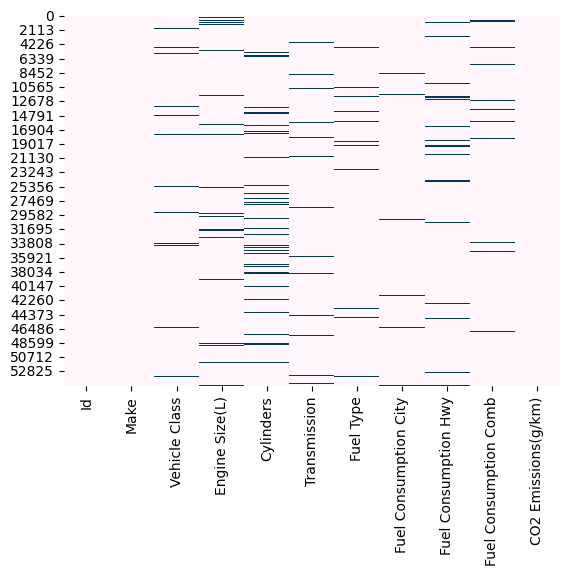

In [95]:
import seaborn as sns
sns.heatmap(train_similarized.isnull(), cbar=False, cmap='PuBu')

In [96]:
sum_null = train_similarized.isnull().sum()
count_null = train_similarized.isnull().count()

total = sum_null.sort_values(ascending=False)
percent = sum_null/count_null.sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(10)

,Total,Percent
Engine Size(L),5264,0.095819
Cylinders,4523,0.082331
Fuel Consumption Hwy,2124,0.038662
Fuel Consumption Comb,2108,0.038371
Vehicle Class,2051,0.037334
Fuel Consumption City,1970,0.035859
Fuel Type,1942,0.035350
Transmission,1483,0.026995
Id,0,0.000000
Make,0,0.000000


Make
FOLD            0.131660
CHEVO           0.120520
BMV             0.108015
TOYOTI          0.068260
NIRRAN          0.053316
JIPU            0.052205
DOGE            0.051514
KIO             0.046945
GONDA           0.045397
RYUNDAI         0.044160
FOLKSWA         0.040920
MATSUDA         0.037807
LECUS           0.037589
CADILUXE        0.033420
BARUSU          0.027486
TOLVO           0.025411
MITSU           0.019713
LAND CRAWLER    0.016910
ASURA           0.015436
FIAR            0.014617
LAMBOGI         0.008701
Name: proportion, dtype: float64


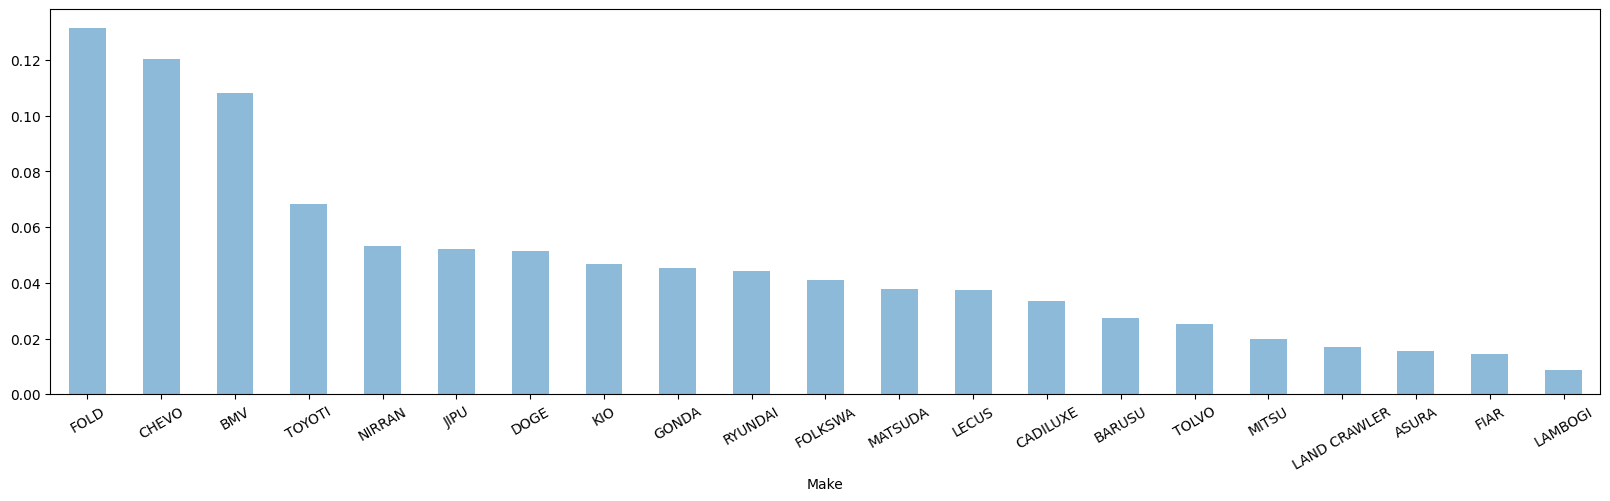

In [97]:
import matplotlib.pyplot as plt

norm = train_similarized['Make'].dropna().value_counts(normalize=True)
print(norm)

plt.figure(figsize=(20, 5))
norm.plot(kind='bar', alpha=0.5, rot=0)
plt.xticks(rotation=30)
plt.show()

Transmission
AS6     0.228907
AS8     0.155928
M6      0.143993
A6      0.098103
AV      0.059172
A8      0.051708
M5      0.038931
AS10    0.034572
AM7     0.027556
A9      0.027164
AV6     0.023010
AV7     0.021757
AM6     0.019568
A5      0.017361
AS9     0.012590
A4      0.010776
AV8     0.006585
AS7     0.005762
AS5     0.005257
A10     0.002918
AM8     0.002862
AV10    0.002526
M7      0.002002
AM9     0.000617
A7      0.000374
Name: proportion, dtype: float64


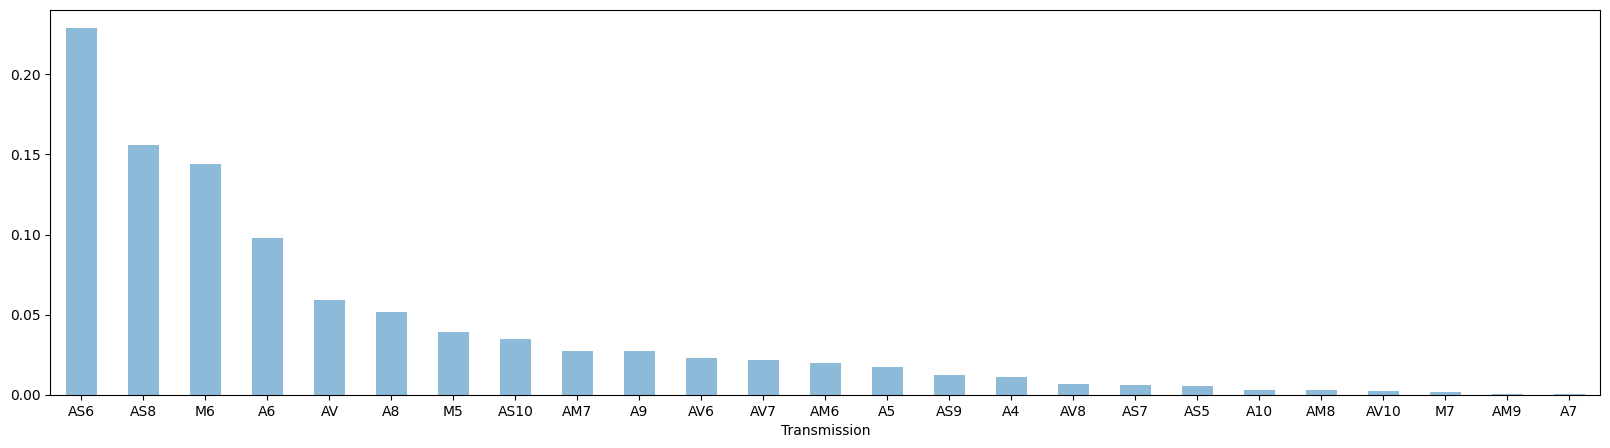

In [98]:
norm = train_similarized['Transmission'].dropna().value_counts(normalize=True)
print(norm)

plt.figure(figsize=(20, 5))
norm.plot(kind='bar', alpha=0.5, rot=0)
plt.show()

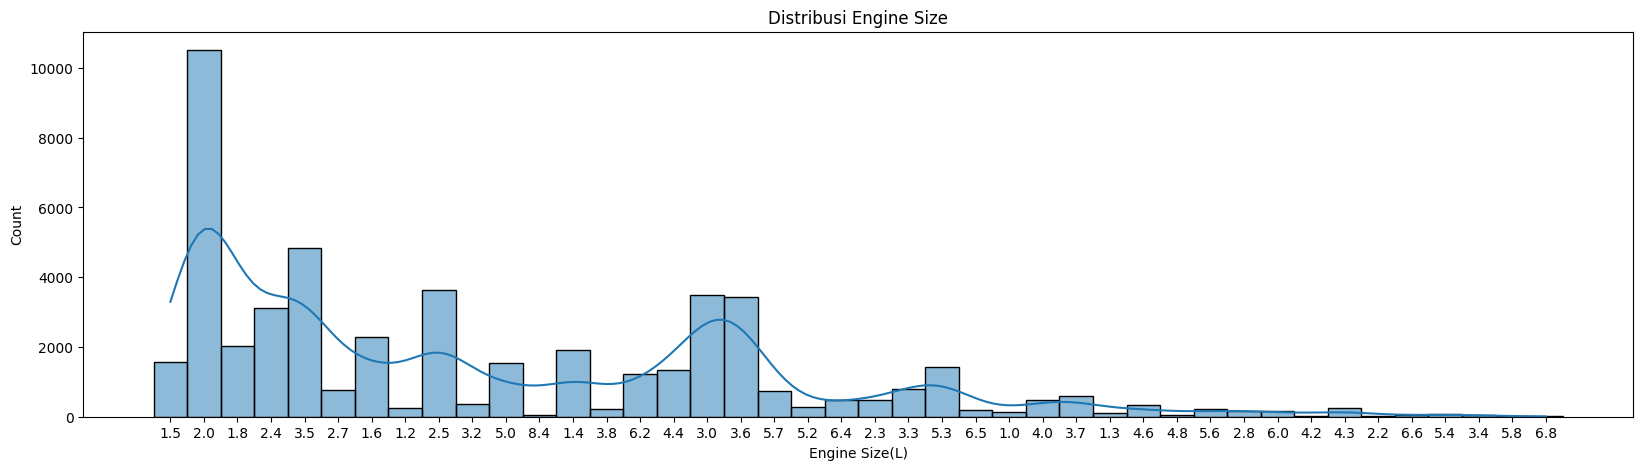

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
sns.histplot(train_similarized['Engine Size(L)'].dropna(), kde=True)
plt.title('Distribusi Engine Size')
plt.show()

Distribusi data skewed ke kiri

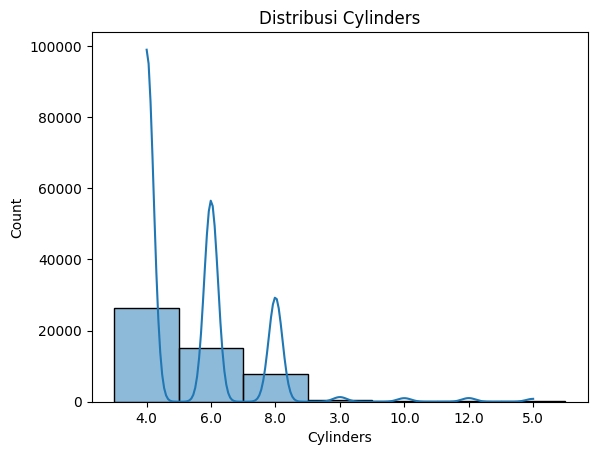

In [100]:
sns.histplot(train_similarized['Cylinders'].dropna(), kde=True)
plt.title('Distribusi Cylinders')
plt.show()

In [101]:
train_similarized.isnull().sum()

Id                          0
Make                        0
Vehicle Class            2051
Engine Size(L)           5264
Cylinders                4523
Transmission             1483
Fuel Type                1942
Fuel Consumption City    1970
Fuel Consumption Hwy     2124
Fuel Consumption Comb    2108
CO2 Emissions(g/km)         0
dtype: int64

In [102]:
# Split the column into 'Number' and 'Unit' based on the pattern
def split_number_unit(df):
    train_fuel_city = df['Fuel Consumption City'].str.extract(r'(?P<number>[\d.]+)\s*(?P<unit>.*)')
    train_fuel_city['number'] = pd.to_numeric(train_fuel_city['number'], errors='coerce')

    train_fuel_Hwy = df['Fuel Consumption Hwy'].str.extract(r'(?P<number>[\d.]+)\s*(?P<unit>.*)')
    train_fuel_Hwy['number'] = pd.to_numeric(train_fuel_Hwy['number'], errors='coerce')

    train_fuel_Comb = df['Fuel Consumption Comb'].str.extract(r'(?P<number>[\d.]+)\s*(?P<unit>.*)')
    train_fuel_Comb['number'] = pd.to_numeric(train_fuel_Comb['number'], errors='coerce')
    
    return train_fuel_city, train_fuel_Hwy, train_fuel_Comb


train_fuel_city, train_fuel_Hwy, train_fuel_Comb = split_number_unit(train_similarized)

print(f'Fuel City: {train_fuel_city.unit.unique()}')
print(f'Fuel Hwy: {train_fuel_Hwy.unit.unique()}')
print(f'Fuel Comb: {train_fuel_Comb.unit.unique()}')

Fuel City: ['km/L' 'km per L' 'L/10km' 'L/100km' nan 'MPG (AS)' 'liters per 100 km'
 'mpg Imp.' 'L/100 km']
Fuel Hwy: ['L/10km' 'L/100km' 'mpg Imp.' 'liters per 100 km' 'MPG (AS)' 'km/L' nan
 'L/100 km' 'km per L']
Fuel Comb: ['L/10km' 'L/100km' 'mpg Imp.' 'liters per 100 km' 'MPG (AS)' nan
 'km per L' 'L/100 km' 'km/L']


In [103]:
def calc_conversion(row):
    convert_factors = {
        'km/L': 100, 
        'km per L': 100,
        'mpg Imp.': 282.480936,
        'MPG (AS)': 235.215, 
        'liters per 100 km': 1,
        'L/100 km': 1,
        'L/100km': 1,
        'L/10km': 10
    }
    
    conversion_factor = convert_factors.get(row['unit'], np.nan)
    number = row['number']

    # Check if the denominator is not zero before performing the division
    result = np.nan
    if conversion_factor != np.nan and number != 0:
        if conversion_factor in ['L/10km', 'L/100km', 'L/100 km', 'liters per 100 km']:
            result = number * conversion_factor
        else:
            result = conversion_factor / number
            
    return result


# Convert nilai berdasarkan tipe unit
def convert_fuel_consumption(df, city, hwy, comb):
    df['Fuel Consumption City (l/100km)'] = city.apply(calc_conversion, axis=1)
    df.drop(columns=['Fuel Consumption City'], inplace=True)

    df['Fuel Consumption Hwy (l/100km)'] = hwy.apply(calc_conversion, axis=1)
    df.drop(columns=['Fuel Consumption Hwy'], inplace=True)

    df['Fuel Consumption Comb (l/100km)'] = comb.apply(calc_conversion, axis=1)
    df.drop(columns=['Fuel Consumption Comb'], inplace=True)
    
    return df


train_converted = convert_fuel_consumption(train_similarized, train_fuel_city, train_fuel_Hwy, train_fuel_Comb)

In [104]:
train_converted.dtypes

Id                                   int64
Make                                object
Vehicle Class                       object
Engine Size(L)                      object
Cylinders                           object
Transmission                        object
Fuel Type                           object
CO2 Emissions(g/km)                  int64
Fuel Consumption City (l/100km)    float64
Fuel Consumption Hwy (l/100km)     float64
Fuel Consumption Comb (l/100km)    float64
dtype: object

In [105]:
# Fill missing value fuel columns dengan nilai mean
def fill_missval_fuel(df):
    df['Fuel Consumption City (l/100km)'].fillna(df['Fuel Consumption City (l/100km)'].mean(), inplace=True)
    df['Fuel Consumption Hwy (l/100km)'].fillna(df['Fuel Consumption Hwy (l/100km)'].mean(), inplace=True)
    df['Fuel Consumption Comb (l/100km)'].fillna(df['Fuel Consumption Comb (l/100km)'].mean(), inplace=True)
    
    return df

train_cleaned = fill_missval_fuel(train_converted)
train_cleaned.isnull().sum()

Id                                    0
Make                                  0
Vehicle Class                      2051
Engine Size(L)                     5264
Cylinders                          4523
Transmission                       1483
Fuel Type                          1942
CO2 Emissions(g/km)                   0
Fuel Consumption City (l/100km)       0
Fuel Consumption Hwy (l/100km)        0
Fuel Consumption Comb (l/100km)       0
dtype: int64

Predict missing value menggunakan Random Forest untuk mengisi data

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_dist(df_col):
    plt.figure(figsize=(20, 5))
    sns.histplot(df_col.dropna(), kde=True)
    plt.title(df_col.name)
    plt.show()

In [107]:
def col_to_numeric(df, cols):
    for col in cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
    return df

In [108]:
from sklearn.preprocessing import LabelEncoder

def encode_keep_nan(df):
    new_df = df.copy()
    
    for col in new_df.columns:
        if new_df[col].dtype == 'object':
            label_encoder = LabelEncoder()
            
            # Encode non-null values
            non_null_values = new_df[col].dropna()
            new_df.loc[non_null_values.index, col] = label_encoder.fit_transform(non_null_values)
            
    return new_df

test_encode = encode_keep_nan(train_cleaned)
test_encode.head()

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,CO2 Emissions(g/km),Fuel Consumption City (l/100km),Fuel Consumption Hwy (l/100km),Fuel Consumption Comb (l/100km)
0,1,16,11,4,3,21,3,208,11.904762,13.888889,10.204082
1,2,20,5,NaN,5,2,3,325,13.793103,0.103093,0.083612
2,3,15,0,7,3,13,3,170,10.204082,7.299249,8.894236
3,4,4,15,NaN,6,3,3,362,5.780347,0.085470,0.067659
4,5,20,0,6,3,23,3,180,0.123457,7.899355,0.124844


In [109]:
# Impute missing values with MICE (Multiple Imputation by Chained Equations)
import miceforest as mf
from sklearn.impute import KNNImputer
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def impute_nan(df, cols, type):
    encoded = encode_keep_nan(df)
    cols_to_drop = encoded.columns[~encoded.columns.isin(cols)]
    to_impute = encoded.drop(cols_to_drop, axis=1)

    if type == "knn":
        # KNN impuation
        impute = KNNImputer()
        KNNImputed = impute.fit_transform(to_impute)
        completed = pd.DataFrame(KNNImputed, columns=to_impute.columns)
    elif type == "miceforest":
        # Mice Forest imputation
        kernel = mf.ImputationKernel(
            data=to_impute,
            save_all_iterations=True,
            random_state=324907
        )
        # Run mice algorithm n iteration
        kernel.mice(3, verbose=True)
        completed = kernel.complete_data(dataset=0, inplace=False)
    elif type == "missforest":
        imputer = MissForest()
        X_imputed = imputer.fit_transform(to_impute)
        completed = pd.DataFrame(X_imputed, columns=to_impute.columns).round(2)


    new_df = pd.concat([encoded[cols_to_drop], completed], axis=1)
    
    return new_df

test_impute = impute_nan(train_cleaned, ['Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type'], "missforest")
test_impute.head()

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


,Id,Make,CO2 Emissions(g/km),Fuel Consumption City (l/100km),Fuel Consumption Hwy (l/100km),Fuel Consumption Comb (l/100km),Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type
0,1,16,208,11.904762,13.888889,10.204082,11.0,4.00,3.0,21.0,3.0
1,2,20,325,13.793103,0.103093,0.083612,5.0,22.00,5.0,2.0,3.0
2,3,15,170,10.204082,7.299249,8.894236,0.0,7.00,3.0,13.0,3.0
3,4,4,362,5.780347,0.085470,0.067659,15.0,32.72,6.0,3.0,3.0
4,5,20,180,0.123457,7.899355,0.124844,0.0,6.00,3.0,23.0,3.0


In [110]:
# Fill missing value di kolom kategorikal dengan nilai modus
def fill_missval_categorical(df):
    df['Vehicle Class'].fillna(df['Vehicle Class'].mode()[0], inplace=True)
    df['Transmission'].fillna(df['Transmission'].mode()[0], inplace=True)
    df['Fuel Type'].fillna(df['Fuel Type'].mode()[0], inplace=True)
    
    return df

# Fill missing value di kolom numerik dengan nilai mean
def fill_missval_num(df):
    df['Engine Size(L)'] = pd.to_numeric(df['Engine Size(L)'], errors='coerce')
    df['Cylinders'] = pd.to_numeric(df['Cylinders'], errors='coerce')
    
    df['Engine Size(L)'].fillna(df['Engine Size(L)'].mean(), inplace=True)
    df['Cylinders'].fillna(df['Cylinders'].mean(), inplace=True)
    
    return df

train_cleaned = fill_missval_categorical(train_cleaned)
train_cleaned = fill_missval_num(train_cleaned)

In [111]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

def encode_categorical(df, cols):
    df_encoded = df.copy()
    for col in cols:
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
    
    return df_encoded


train_encoded = encode_categorical(train_cleaned, train_cleaned.columns[train_cleaned.dtypes == 'object'])

train_encoded.head()

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,CO2 Emissions(g/km),Fuel Consumption City (l/100km),Fuel Consumption Hwy (l/100km),Fuel Consumption Comb (l/100km)
0,1,16,11,1.500000,4.0,21,3,208,11.904762,13.888889,10.204082
1,2,20,5,2.978387,6.0,2,3,325,13.793103,0.103093,0.083612
2,3,15,0,2.000000,4.0,13,3,170,10.204082,7.299249,8.894236
3,4,4,15,2.978387,8.0,3,3,362,5.780347,0.085470,0.067659
4,5,20,0,1.800000,4.0,23,3,180,0.123457,7.899355,0.124844


In [112]:
train_encoded.shape

(54937, 11)

<Axes: >

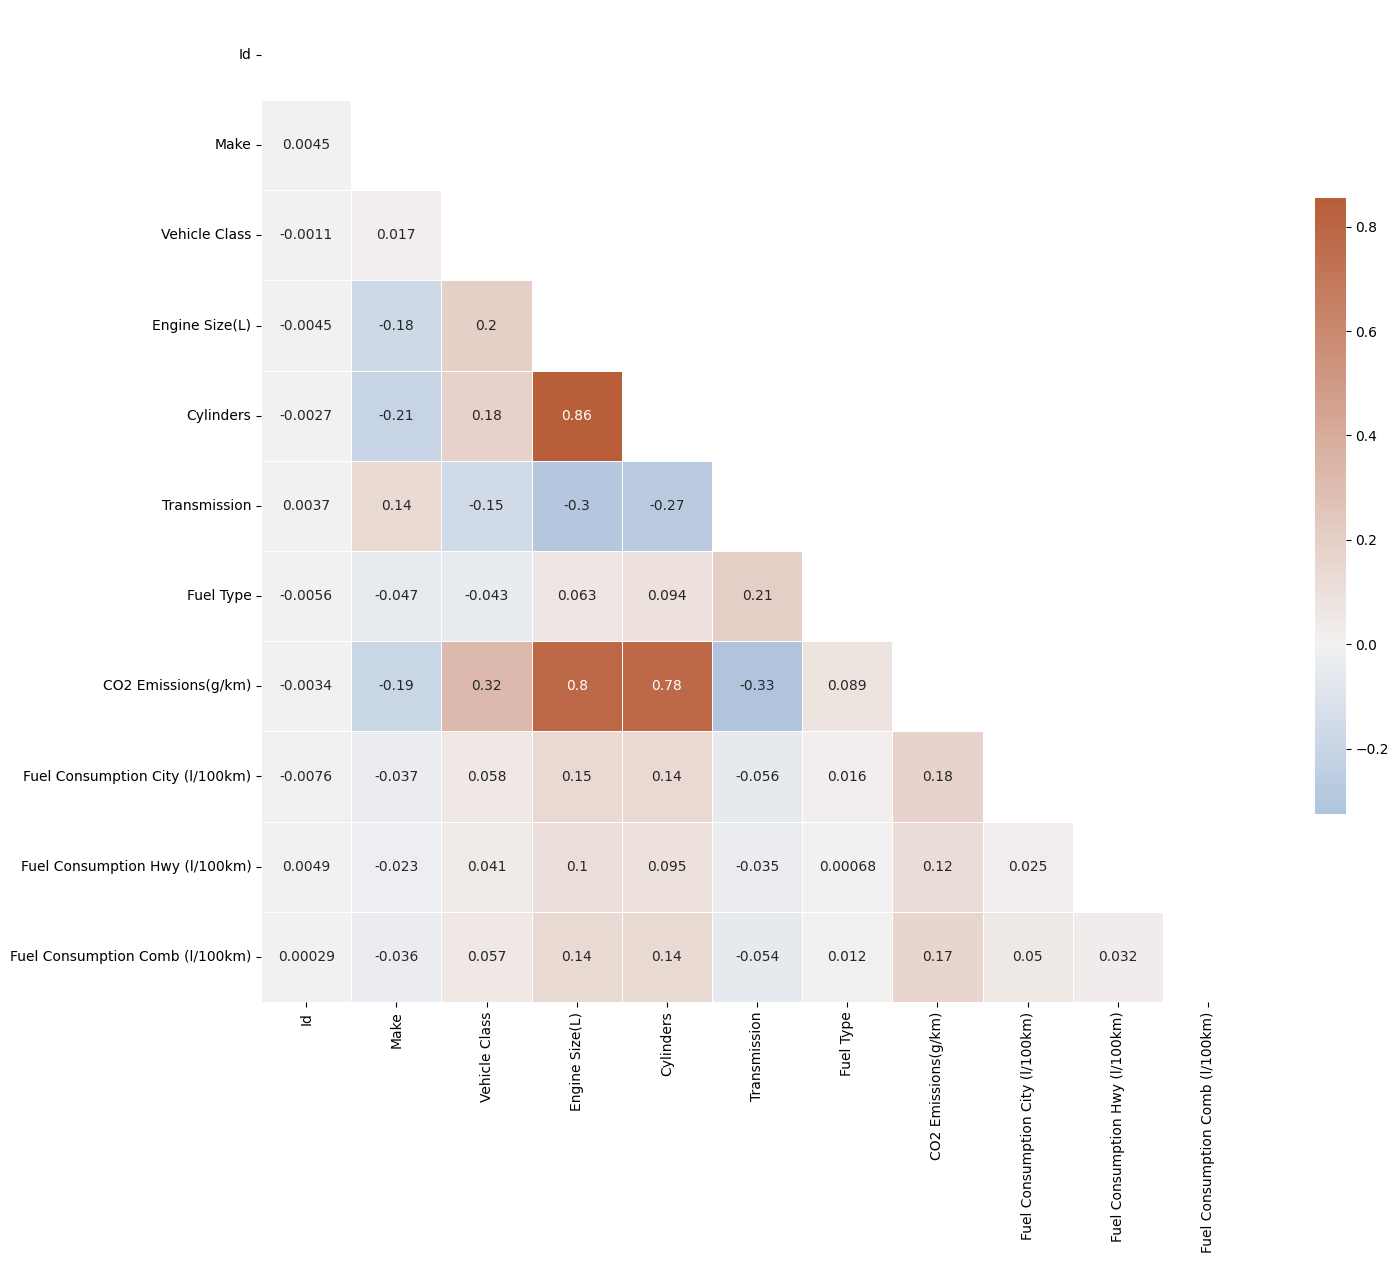

In [113]:
corr = train_encoded.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
f, ax = plt.subplots(figsize=(16,16))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0, square=True, annot=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

<Axes: >

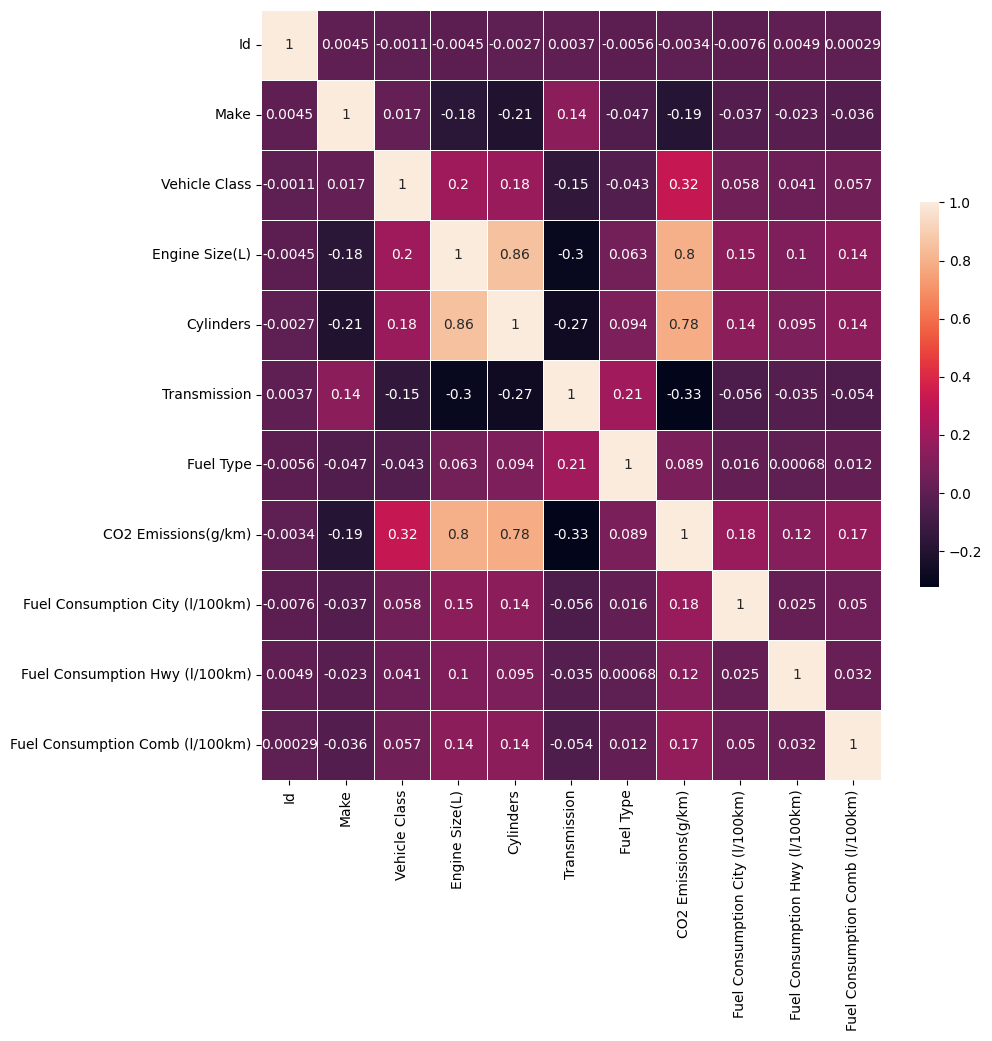

In [114]:
corr = train_encoded.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

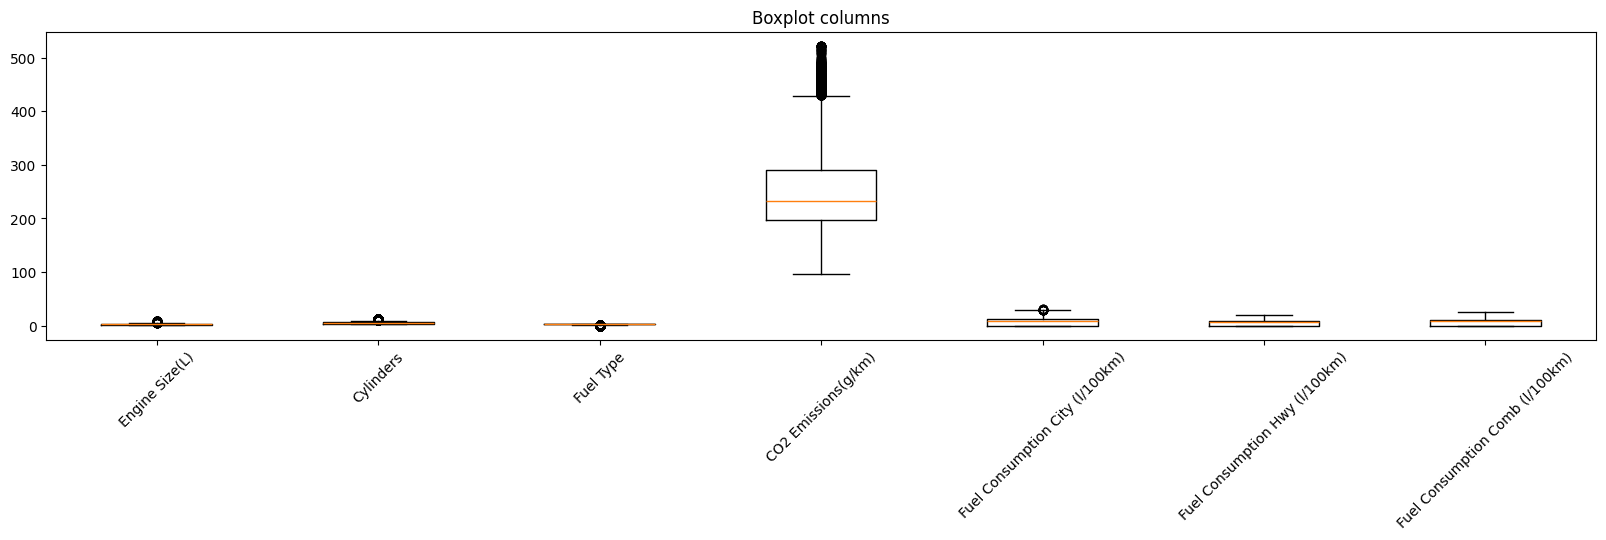

In [115]:
# Boxplot IQR to visualize outliers
def visualize_outliers(df):
    exclude_cols = ['Make', 'Vehicle Class', 'Transmission', 'Id']
    cols_to_plot = [col for col in df.columns if col not in exclude_cols]
    data_to_plot = [df[col].dropna().values for col in cols_to_plot]

    plt.figure(figsize=(20, 4))
    plt.boxplot(x=data_to_plot, labels=cols_to_plot)
    plt.title("Boxplot columns")
    plt.xticks(rotation=45)
    plt.show()
    

visualize_outliers(train_encoded)

In [116]:
def impute_outliers(df, cols, method='mode'):
    df_subset = df.drop(columns=cols)

    # Calculate IQR
    Q1 = df_subset.quantile(0.25)
    Q3 = df_subset.quantile(0.75)
    IQR = Q3 - Q1

    # Identify and replace outliers with the mode
    for col in df_subset.columns:
        lower_bound = Q1[col] - 1.5 * IQR[col]
        upper_bound = Q3[col] + 1.5 * IQR[col]

        if method == 'mode':
            replace_method = df_subset[col].mode()[0]
        elif method == 'mean':
            replace_method = df_subset[col].mean()
        else:
            replace_method = df_subset[col].median()

        # Replace outliers with the mode
        df_subset[col] = np.where((df_subset[col] < lower_bound) | (df_subset[col] > upper_bound),
                                    replace_method,
                                    df_subset[col])

    # Concatenate 'id' and 'make' columns back to the modified DataFrame
    modified_df = pd.concat([df[cols], df_subset], axis=1)
    
    return modified_df


train_imputed = impute_outliers(train_encoded, ['Make', 'Vehicle Class', 'Transmission', 'Id', 'CO2 Emissions(g/km)'])

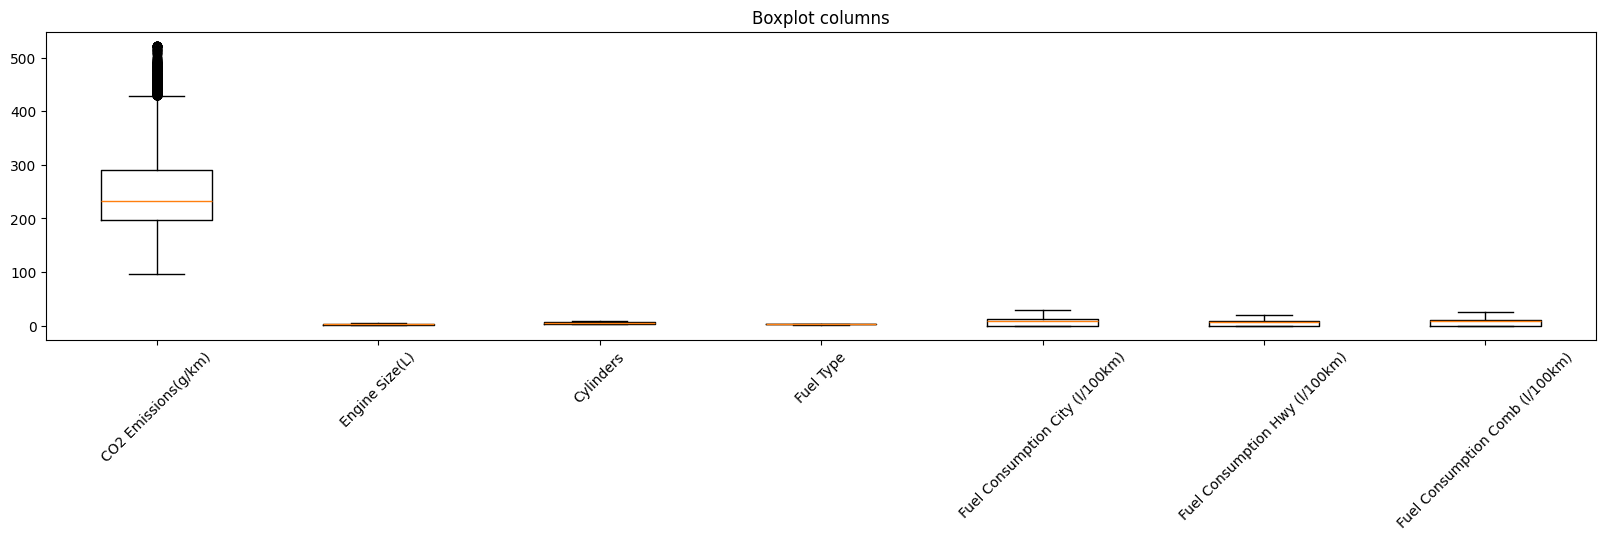

In [117]:
visualize_outliers(train_imputed)

In [118]:
train_imputed.shape

(54937, 11)

In [119]:
train_imputed.dtypes

Make                                 int32
Vehicle Class                        int32
Transmission                         int32
Id                                   int64
CO2 Emissions(g/km)                  int64
Engine Size(L)                     float64
Cylinders                          float64
Fuel Type                            int32
Fuel Consumption City (l/100km)    float64
Fuel Consumption Hwy (l/100km)     float64
Fuel Consumption Comb (l/100km)    float64
dtype: object

In [120]:
# # Feature Selection

# # Standardize data
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# r_scaler = MinMaxScaler()
# r_scaler.fit(train)
# modified_data = pd.DataFrame(r_scaler.transform(train), index=train.index, columns=train.columns)

# # Filtering method (chi-square value)
# from sklearn.feature_selection import SelectKBest, chi2
# X = modified_data.loc[:, modified_data.columns != 'CO2 Emissions(g/km)']
# y = modified_data[['CO2 Emissions(g/km)']]
# selector = SelectKBest(chi2, k=10)
# selector.fit(X, y)
# X_new = selector.transform(X)
# print(X.columns[selector.get_support(indices=True)])

In [121]:
# Scaler
from sklearn.preprocessing import StandardScaler

def normalize(df, exclude_cols):
    df_exclude = df.drop(columns=exclude_cols, axis=1)
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_exclude), index=df_exclude.index, columns=df_exclude.columns)
    
    return pd.concat([df_scaled, df[exclude_cols]], axis=1)

In [122]:
# Simpan preprocessed data
import pickle
import os

def save_processed_data(df, filename):
    if not os.path.exists('../data/processed'):
        os.makedirs('../data/processed')

    with open(f'../data/processed/{filename}.pkl', 'wb') as f:
        pickle.dump(df, f)

In [123]:
processed_data = train.copy()

processed_data = similarize_missing_values(processed_data)
city, hwy, comb = split_number_unit(processed_data)
processed_data = convert_fuel_consumption(processed_data, city, hwy, comb)

cleaned_data = fill_missval_fuel(processed_data)
# cleaned_data = fill_missval_categorical(cleaned_data)
# cleaned_data = fill_missval_num(cleaned_data)
# encoded_data = encode_categorical(cleaned_data)

modified_data = col_to_numeric(cleaned_data, ['Engine Size(L)', 'Cylinders'])
imputed_data = impute_nan(modified_data, ['Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type'], "missforest")

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


In [124]:
imputed_outlier_data = impute_outliers(imputed_data, ['Make', 'Vehicle Class', 'Transmission', 'Id'], 'median')

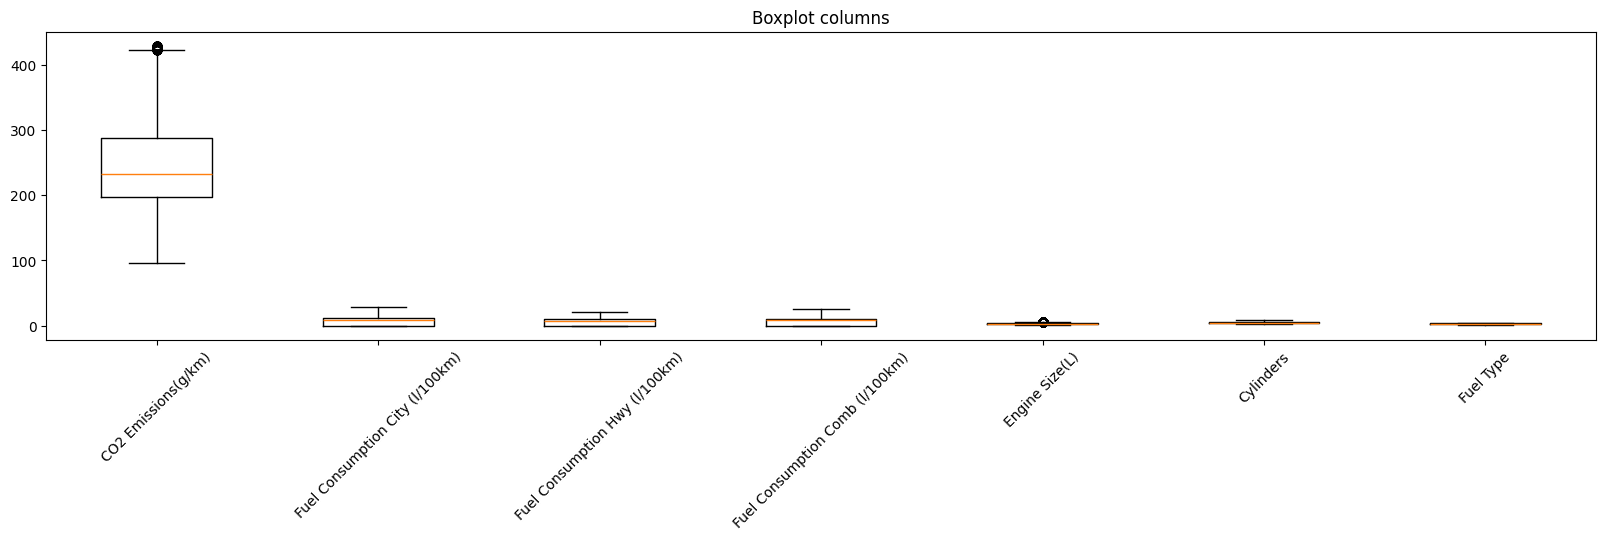

In [125]:
visualize_outliers(imputed_outlier_data)

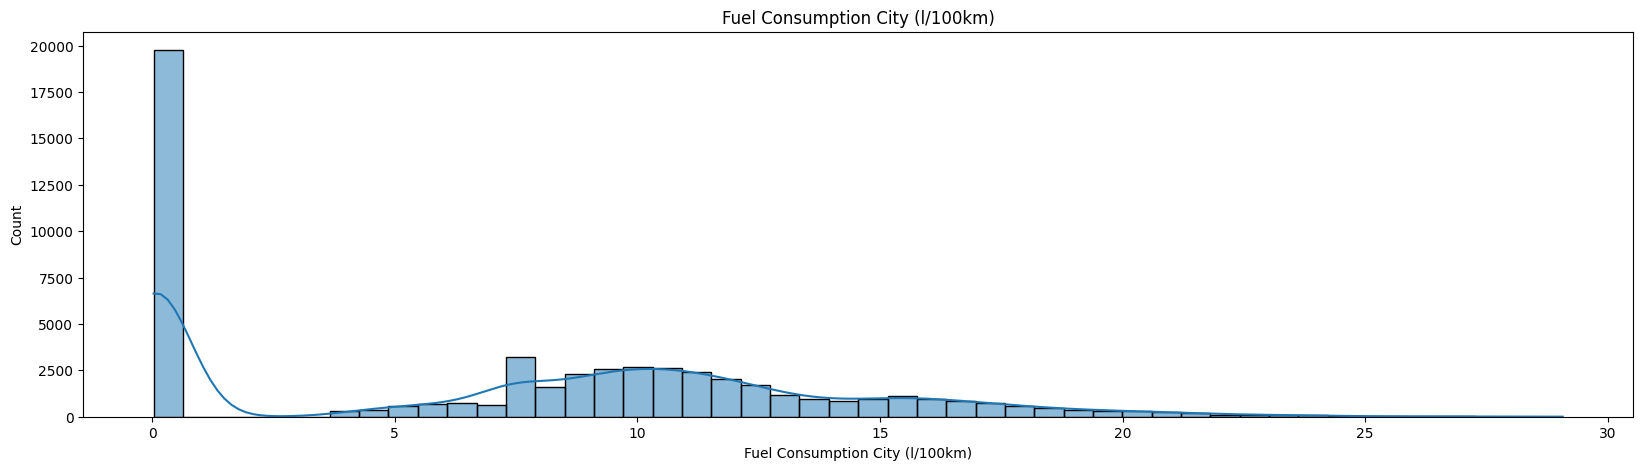

In [126]:
visualize_dist(imputed_outlier_data['Fuel Consumption City (l/100km)'])

In [127]:
encode_data = encode_categorical(imputed_outlier_data, ['Make'])
normal_data = normalize(encode_data, ['Id', 'Make', 'Vehicle Class', 'Transmission', 'Fuel Type', 'CO2 Emissions(g/km)'])

save_processed_data(normal_data, 'train-processed-v3')

In [128]:
test = pd.read_csv('../data/raw/v2/test.csv')

ts_processed_data = test.copy()

ts_processed_data = similarize_missing_values(ts_processed_data)
city, hwy, comb = split_number_unit(ts_processed_data)
ts_processed_data = convert_fuel_consumption(ts_processed_data, city, hwy, comb)

ts_cleaned_data = fill_missval_fuel(ts_processed_data)
# ts_cleaned_data = fill_missval_categorical(ts_cleaned_data)
# ts_cleaned_data = fill_missval_num(ts_cleaned_data)
# encoded_data = encode_categorical(ts_cleaned_data)

ts_modified_data = col_to_numeric(ts_cleaned_data, ['Engine Size(L)', 'Cylinders'])
ts_imputed_data = impute_nan(ts_modified_data, ['Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type'], "missforest")

ts_imputed_outlier_data = impute_outliers(ts_imputed_data, ['Make', 'Vehicle Class', 'Transmission', 'Id'], 'median')

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


In [129]:
ts_encode_data = encode_categorical(ts_imputed_outlier_data, ['Make'])
ts_normal_data = normalize(ts_encode_data, ['Id', 'Make', 'Vehicle Class', 'Transmission', 'Fuel Type'])

save_processed_data(ts_normal_data, 'test-processed-v3')